In [0]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split

# Mount data from google drive

In [0]:

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
admit_predict = pd.read_csv('gdrive/My Drive/Admission_Predict.csv')
admit_predict.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [0]:
admit_predict.drop(['Serial No.'], axis = 1, inplace = True)
admit_predict.head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# Faceted plots with Seaborn package

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


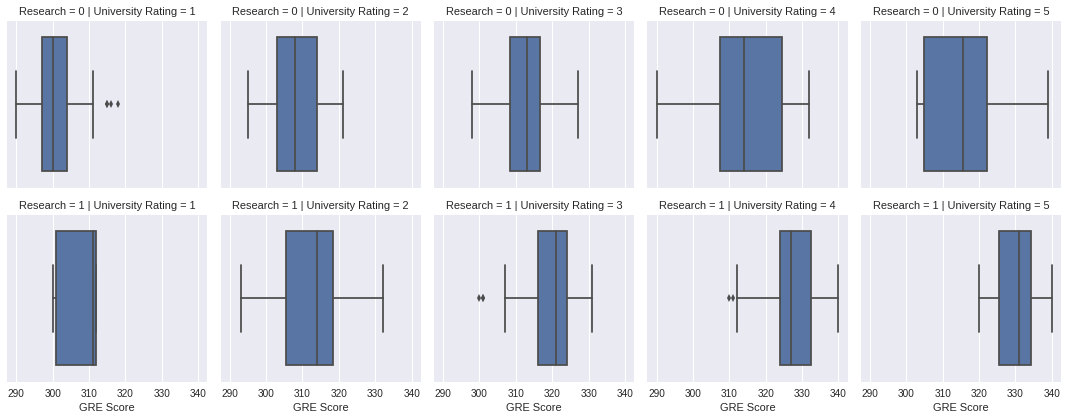

In [0]:
score_by_university = admit_predict[['GRE Score', 'TOEFL Score', 'University Rating','Research']]
g = sns.FacetGrid(score_by_university, row = "Research", col="University Rating")
g.map(sns.boxplot, 'GRE Score')

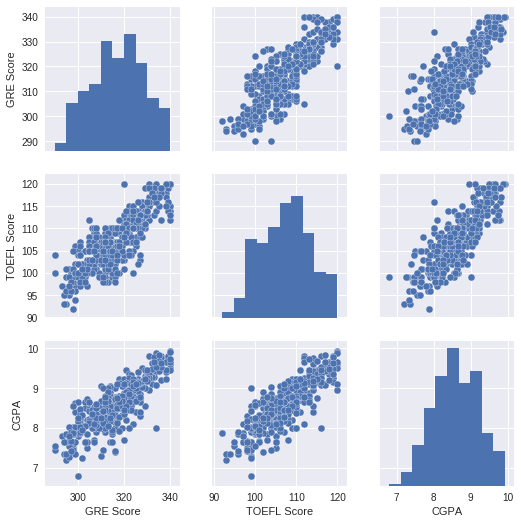

In [0]:
sns.pairplot(admit_predict[['GRE Score', 'TOEFL Score', 'CGPA']])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


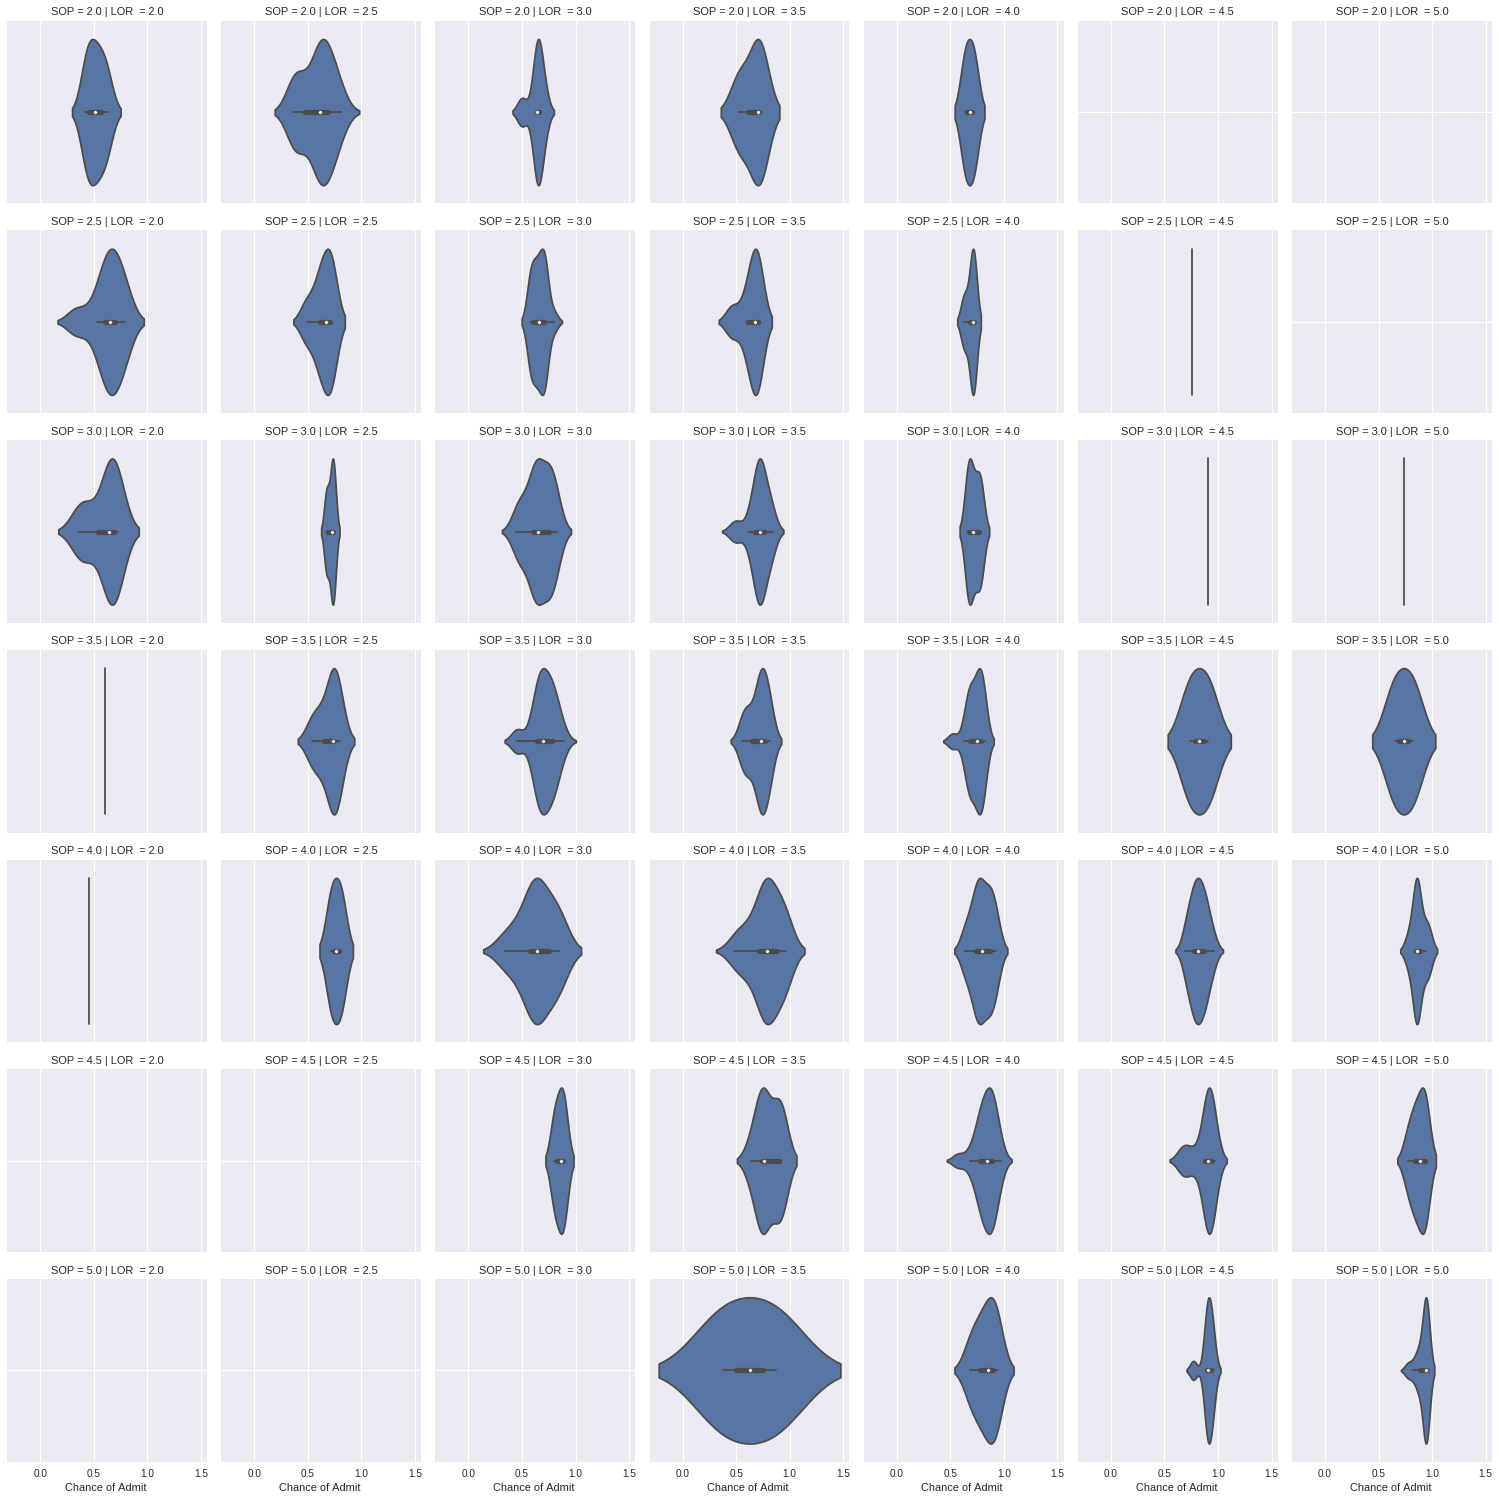

In [0]:
admit_chance = admit_predict[(admit_predict['SOP']>1.5) & (admit_predict['LOR ']>1.5)][['Chance of Admit ' ,'SOP','LOR ' ]]
g = sns.FacetGrid(admit_chance, row = "SOP", col="LOR ")
g.map(sns.violinplot, 'Chance of Admit ')

# Correlation heatmap with Seaborn package

In [0]:
corr = admit_predict.corr()
corr

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


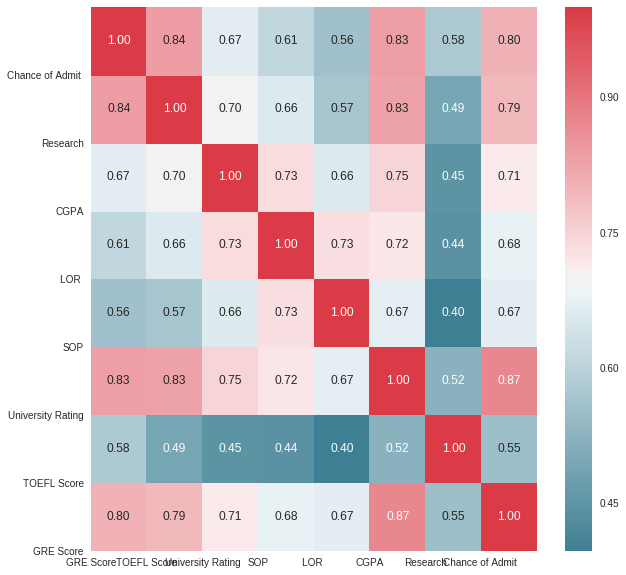

In [0]:
fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns) 
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

# Splitting data into test and train

In [0]:
X = admit_predict[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA','Research' ]].values
Y = admit_predict[['Chance of Admit ']].values

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .3, random_state=25)

In [0]:
print("Original Data Frame size:", len(X))
print("After splitting")
print("Size of test:", len(X_test))
print("Size of train:", len(X_train))

Original Data Frame size: 400
After splitting
Size of test: 120
Size of train: 280
